In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Define directories
train_dir = "C:/Users/Lenovo/Documents/archive/train"
validation_dir = "C:/Users/Lenovo/Documents/archive/data"
test_dir="C:/Users/Lenovo/Documents/archive/test"

In [3]:
# Explore the dataset
def explore_dataset(directory):
    classes = os.listdir(directory)
    print(f"Classes: {classes}")
    
    for cls in classes:
        class_dir = os.path.join(directory, cls)
        images = os.listdir(class_dir)
        print(f"Class: {cls} - Number of images: {len(images)}")
        
        # Display a sample image from each class
        sample_image_path = os.path.join(class_dir, images[0])
        img = Image.open(sample_image_path)
        plt.imshow(img)
        plt.title(f"Class: {cls}")
        plt.show()

Training Data:
Classes: ['benign', 'malignant']
Class: benign - Number of images: 1440


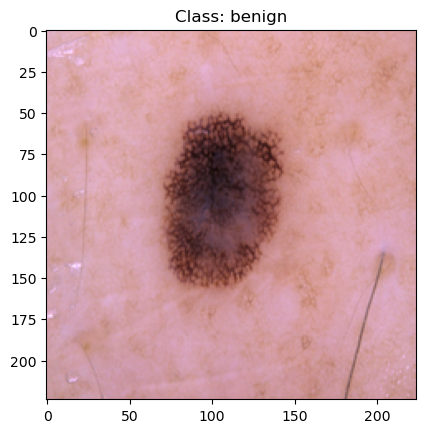

Class: malignant - Number of images: 1197


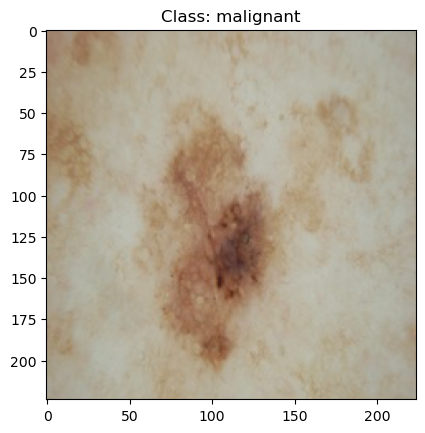

In [4]:
# Explore training data
print("Training Data:")
explore_dataset(train_dir)

In [5]:
# Explore validation data
print("Validation Data:")
explore_dataset(validation_dir)

Validation Data:
Classes: ['test', 'train']
Class: test - Number of images: 2


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Lenovo\\Documents\\archive\\data\\test\\benign'

Test Data:
Classes: ['benign', 'malignant']
Class: benign - Number of images: 360


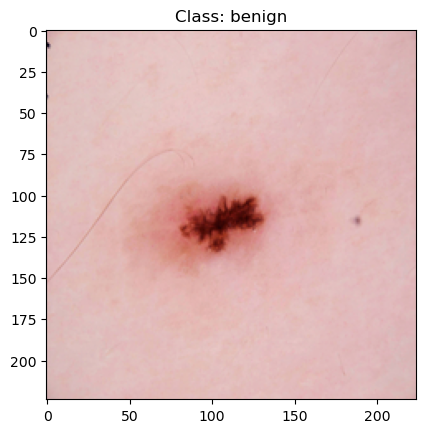

Class: malignant - Number of images: 300


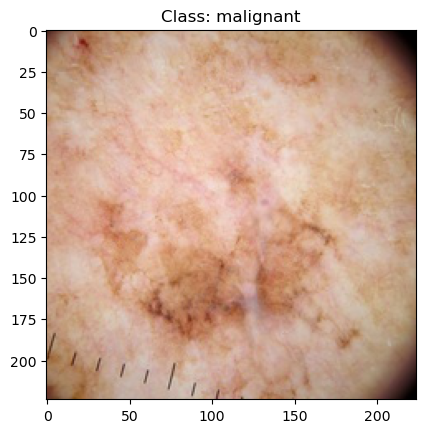

In [11]:
# Explore validation data
print("Test Data:")
explore_dataset(test_dir)

In [13]:
# Define the image augmentation parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Define parameters
batch_size = 32
img_height = 224
img_width = 224
num_classes = 2  # Set this to the number of classes in your dataset

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Create the base model
base_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3),
                  kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Unfreeze some layers for fine-tuning
for layer in base_model.layers[:10]:  # Adjust the range to fine-tune more layers
    layer.trainable = True


# Compile the model
base_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = base_model.fit(
    train_generator,
    epochs=10,  # Increased epochs since training is now more complex
    validation_data=validation_generator,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Early stopping with restored weights
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Patience increased for LR reduction
    ]
)

Found 2637 images belonging to 2 classes.
Found 3297 images belonging to 2 classes.


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.7029 - loss: 7.0046 - val_accuracy: 0.2002 - val_loss: 19.0960 - learning_rate: 5.0000e-04
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.7626 - loss: 1.9754 - val_accuracy: 0.2517 - val_loss: 9.6285 - learning_rate: 5.0000e-04
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.7583 - loss: 1.2758 - val_accuracy: 0.2499 - val_loss: 21.1622 - learning_rate: 5.0000e-04
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.7951 - loss: 0.9959 - val_accuracy: 0.2536 - val_loss: 21.2317 - learning_rate: 5.0000e-04
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.7804 - loss: 1.0319 - val_accuracy: 0.3358 - val_loss: 13.8985 - learning_rate: 5.0000e-04
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8016 - loss: 0.9786

In [ ]:
# Evaluate the model
loss, accuracy = base_model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plot training and validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
x = np.arange(len(history.history['accuracy']))
y_train = np.array(history.history['accuracy'])
y_val = np.array(history.history['val_accuracy'])

plt.plot(x, y_train, marker='.', linestyle='-')
plt.plot(x, y_val, marker='.', linestyle='-')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
x = np.arange(len(history.history['loss']))
y_train = np.array(history.history['loss'])
y_val = np.array(history.history['val_loss'])

plt.plot(x, y_train, marker='o', linestyle='-')
plt.plot(x, y_val, marker='o', linestyle='-')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Confusion matrix and classification report
Y_pred = base_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = list(validation_generator.class_indices.keys())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
model_path = "C:/Users/Lenovo/Documents/miniproject/my_model.keras"
base_model.save('my_model.keras')

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model_path = "my_model.keras"  # Update this with your model path
loaded_model = load_model(model_path)

# Load and preprocess the image
image_path = "C:/Users/Lenovo/Documents/miniproject/ISBI2016_ISIC_Part1_Data_(1)/Benign/ISIC_0000035.jpg"  # Update with your image path
img = image.load_img(image_path, target_size=(224, 224))  # Resize to the model's expected input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match the model's input shape
img_array /= 255.0  # Normalize the image

# Make prediction
output = loaded_model.predict(img_array)
print(f'Raw model output: {output}')  # Check the raw output
                                                                 
# Define class labels
class_labels = ['benign', 'malignant']  # Adjust if necessary

# Determine predicted class
if output.shape[1] == 1:  # If using sigmoid
    predicted_class = (output > 0.5).astype("int32")  # Use threshold
    predicted_disease = class_labels[predicted_class[0][0]]  # Adjust for single output
else:  # If using softmax
    predicted_class = np.argmax(output)
    predicted_disease = class_labels[predicted_class]

print(f'Predicted Disease: {predicted_disease}')
# Optional: Print confidence levels
confidence = output[0][predicted_class] if output.shape[1] == 2 else output[0][0]
print(f'Confidence Level: {confidence:.2f}')

# Visualize the image and prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_disease}, Confidence: {confidence:.2f}')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model_path = "my_model.keras"  # Update this with your model path
loaded_model = load_model(model_path)

# Load and preprocess the image
image_path = "C:/Users/Lenovo/Documents/miniproject/ISBI2016_ISIC_Part1_Data_(1)/Malignant/ISIC_0000052.jpg"  # Update with your image path
img = image.load_img(image_path, target_size=(224, 224))  # Resize to the model's expected input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match the model's input shape

# Make prediction
output = loaded_model.predict(img_array)
predicted_class = np.argmax(output)

# Define class labels
class_labels = [ 'malignant' , 'benign']  # Update with your actual labels
predicted_disease = class_labels[predicted_class]

print(f'Predicted Disease: {predicted_disease}')
# Optional: Print confidence levels
confidence = output[0][predicted_class] if output.shape[1] == 2 else output[0][0]
print(f'Confidence Level: {confidence:.2f}')

# Visualize the image and prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_disease}, Confidence: {confidence:.2f}')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the model
model_path = "my_model.keras"  # Update this with your model path
loaded_model = load_model(model_path)

# Load and preprocess the image
image_path = "C:/Users/Lenovo/Documents/miniproject/ISBI2016_ISIC_Part1_Data_(1)/Benign/ISIC_0000035.jpg"  # Update with your image path
img = image.load_img(image_path, target_size=(224, 224))  # Resize to the model's expected input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match the model's input shape

# Make prediction
output = loaded_model.predict(img_array)
predicted_class = np.argmax(output)

# Define class labels
class_labels = ['benign', 'malignant']  # Update with your actual labels
predicted_disease = class_labels[predicted_class]

print(f'Predicted Disease: {predicted_disease}')
# Optional: Print confidence levels
confidence = output[0][predicted_class] if output.shape[1] == 2 else output[0][0]
print(f'Confidence Level: {confidence:.2f}')

# Visualize the image and prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_disease}, Confidence: {confidence:.2f}')
plt.axis('off')
plt.show()

In [ ]:
pip install opencv-python

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define parameters
batch_size = 32
img_height = 224
img_width = 224

# Data augmentation for training data
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Changed to binary
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Changed to binary
)

# Create the base model
base_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3),
                  kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Unfreeze all layers
for layer in base_model.layers:
    layer.trainable = True

# Compile the model
base_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = base_model.fit(
    train_generator,
    epochs=30,  # Increased epochs
    validation_data=validation_generator,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
)

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image

# Load your pre-trained model (replace with your model path)
model = tf.keras.models.load_model('new_vgg16_model.h5')

# Print model summary to verify its structure
model.summary()

# Initialize the model by calling it with dummy input
dummy_input = np.random.random((1, 224, 224, 3)).astype(np.float32)  # Ensure it's float32
model.predict(dummy_input)  # Call the model to initialize

# Function to preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)  # Adjust based on your model
    return img_array

# Function to apply Grad-CAM
def apply_gradcam(image_path, model, layer_name, target_size=(224, 224), class_idx=0):
    img_array = preprocess_image(image_path, target_size)

    # Create a model that outputs the specified layer and the model output
    conv_layer_output = model.get_layer(layer_name).output
    model_output = model.output

    # Ensure that both outputs are Keras tensors
    if isinstance(model_output, list):
        model_output = model_output[0]  # Take the first output if it's a list

    grad_model = tf.keras.models.Model(inputs=model.input, outputs=[conv_layer_output, model_output])

    # Get the gradients of the last layer with respect to the output
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]  # Use the correct class index

    # Compute gradients
    grads = tape.gradient(loss, conv_outputs)

    # Process the gradients and outputs
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Average gradients
    conv_outputs = conv_outputs[0]  # Remove batch dimension
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]  # Dot product to get heatmap
    heatmap = tf.squeeze(heatmap)  # Remove dimensions of size 1
    heatmap = tf.maximum(heatmap, 0)  # ReLU
    heatmap /= tf.reduce_max(heatmap)  # Normalize

    return heatmap.numpy()

# Function to overlay the heatmap on the original image
def overlay_heatmap(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to match the heatmap size
    heatmap = cv2.resize(heatmap, (224, 224))  # Resize heatmap to match the image size
    heatmap = np.uint8(255 * heatmap)  # Scale heatmap to 0-255
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply colormap
    superimposed_img = cv2.addWeighted(img, alpha, heatmap, 1 - alpha, 0)  # Overlay heatmap
    return superimposed_img

# Example usage
if __name__ == "__main__":
    image_path = "C:/Users/Lenovo/Documents/miniproject/ISBI2016_ISIC_Part1_Data_(1)/Benign/ISIC_0000035.jpg"  # Path to your image
    class_idx = 1  # Change this to the index of the class you want to visualize

    # Choose the layer name from the printed model summary
    layer_name = 'conv2d_2'  # Replace with an appropriate convolutional layer name

    # Apply Grad-CAM
    heatmap = apply_gradcam(image_path, model, layer_name=layer_name, class_idx=class_idx)

    # Overlay the heatmap on the original image
    superimposed_img = overlay_heatmap(image_path, heatmap)

    # Display the result
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
